<a href="https://colab.research.google.com/github/pranavgupta0001/diabetes-readmission-prediction/blob/main/code/dataLoader/MHIProject0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


MHIProject: Explainable Boosting Machine for Diabetes Dataset

Assignment by Devavrat Singh Bisht, Sanchit Kaul, Pranav Gupta, Suhayab Abdi

# Section 1: Data Loading and Visualization

In [ ]:
# Installing necessary libraries
!pip install ucimlrepo interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 202.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 19.8 MB/s eta 0:00:00
  Create

In [ ]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA, TruncatedSVD
from scipy.sparse import csr_matrix

import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

import xgboost as xgb
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Fetching dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
# Loading features and target data
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

In [ ]:
X

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [ ]:
x = diabetes_130_us_hospitals_for_years_1999_2008.variables
x

,name,role,type,demographic,description,units,missing_values
0,encounter_id,ID,,None,Unique identifier of an encounter,None,no
1,patient_nbr,ID,,None,Unique identifier of a patient,None,no
2,race,Feature,Categorical,Race,"Values: Caucasian, Asian, African American, Hi...",None,yes
3,gender,Feature,Categorical,Gender,"Values: male, female, and unknown/invalid",None,no
4,age,Feature,Categorical,Age,"Grouped in 10-year intervals: [0, 10), [10, 20...",None,no
5,weight,Feature,Categorical,None,Weight in pounds.,None,yes
6,admission_type_id,Feature,Categorical,None,Integer identifier corresponding to 9 distinct...,None,no
7,discharge_disposition_id,Feature,Categorical,None,Integer identifier corresponding to 29 distinc...,None,no
8,admission_source_id,Feature,Categorical,None,Integer identifier corresponding to 21 distinc...,None,no
9,time_in_hospital,Feature,Integer,None,Integer number of days between admission and d...,None,no


In [ ]:
x.to_csv('variables.csv')

# Section 2: Data Preprocessing

## Step 1: Handle missing values

In [ ]:
# Dropping specified columns
X = X.drop(columns=['max_glu_serum', 'A1Cresult', 'weight', 'payer_code', 'medical_specialty'])

# Merge the features and target dataframes
data_df = X.copy()
data_df['readmitted'] = y['readmitted']

# Dropping rows with missing values in specified columns
data_df = data_df.dropna(subset=['race', 'diag_1', 'diag_2', 'diag_3'])

## Step 2: Encode categorical features

In [ ]:
categorical_cols = [col for col in data_df.select_dtypes(include=['object']).columns if col != 'readmitted']
numerical_cols = data_df.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
# One-hot encode all categorical columns
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = ohe.fit_transform(data_df[categorical_cols])

# Create the encoded DataFrame with the same index as the original data_df
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_cols), index=data_df.index)

# Drop the original categorical columns and merge the encoded columns
data_df = data_df.drop(columns=categorical_cols)
data_df = pd.concat([data_df, encoded_df], axis=1)

In [ ]:
# scaling numerical columns
scaler = StandardScaler()
existing_numerical_cols = [col for col in numerical_cols if col in data_df.columns]
data_df[existing_numerical_cols] = scaler.fit_transform(data_df[existing_numerical_cols])


In [ ]:
# Process target variable
data_df['readmitted'] = data_df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

In [ ]:
# Plotting unique counts in the target variable
y_count = data_df['readmitted'].value_counts()

In [ ]:
# Split into features and target
X = data_df.drop(columns=['readmitted'])
y = data_df['readmitted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the processed data
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

"""
# Convert one-hot encoded DataFrame to sparse format
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# Feature selection: Select top 300 features (adjust as needed)
selector = SelectKBest(score_func=f_classif, k=300)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
# PCA for further dimensionality reduction (reduce to 100 components)
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

# Use TruncatedSVD for dimensionality reduction (PCA for sparse data)
svd = TruncatedSVD(n_components=100)
X_train_reduced = svd.fit_transform(X_train_selected)
X_test_reduced = svd.transform(X_test_selected)

# Print new shapes after PCA
print("Shapes after feature selection and PCA:")
print("X_train_pca:", X_train_reduced.shape)
print("X_test_pca:", X_test_reduced.shape)
"""

X_train shape: (78442, 2311)
X_test shape: (19611, 2311)


'\n# Convert one-hot encoded DataFrame to sparse format\nX_train_sparse = csr_matrix(X_train)\nX_test_sparse = csr_matrix(X_test)\n\n# Feature selection: Select top 300 features (adjust as needed)\nselector = SelectKBest(score_func=f_classif, k=300)\nX_train_selected = selector.fit_transform(X_train, y_train)\nX_test_selected = selector.transform(X_test)\n# PCA for further dimensionality reduction (reduce to 100 components)\npca = PCA(n_components=100)\nX_train_pca = pca.fit_transform(X_train_selected)\nX_test_pca = pca.transform(X_test_selected)\n\n# Use TruncatedSVD for dimensionality reduction (PCA for sparse data)\nsvd = TruncatedSVD(n_components=100)\nX_train_reduced = svd.fit_transform(X_train_selected)\nX_test_reduced = svd.transform(X_test_selected)\n\n# Print new shapes after PCA\nprint("Shapes after feature selection and PCA:")\nprint("X_train_pca:", X_train_reduced.shape)\nprint("X_test_pca:", X_test_reduced.shape)\n'

# Section 3: Models

##Explainable Boosting Machine (EBM) Training

In [ ]:
# Creating and training the EBM model
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

#Accuracy: 0.5807964917648258

In [ ]:
# Make predictions
y_pred_train = ebm.predict(X_train)
y_pred_test = ebm.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
#Accuracy: 0.5807964917648258

##Tensorflow Neural net

In [ ]:
# Improved neural network architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
#Test Accuracy: 0.637958288192749

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.5684 - loss: 1.0992 - val_accuracy: 0.6308 - val_loss: 0.8581 - learning_rate: 0.0010
Epoch 2/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6200 - loss: 0.8374 - val_accuracy: 0.6329 - val_loss: 0.7495 - learning_rate: 0.0010
Epoch 3/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6312 - loss: 0.7383 - val_accuracy: 0.6371 - val_loss: 0.6982 - learning_rate: 0.0010
Epoch 4/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6340 - loss: 0.6937 - val_accuracy: 0.6292 - val_loss: 0.6796 - learning_rate: 0.0010
Epoch 5/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6365 - loss: 0.6736 - val_accuracy: 0.6334 - val_loss: 0.6684 - learning_rate: 0.0010
Epoch 6/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6366 - loss: 0.6673 - val_accuracy: 0.6345 - val_loss: 0.6636 - learning_rate: 0.0010
Epoch 7/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6366 - loss: 0.6653

In [ ]:
len(feature_names)

42

##random forest

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the Random Forest model
model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params
#result
#Fitting 3 folds for each of 216 candidates, totalling 648 fits

In [ ]:
best_params = {'bootstrap': False,'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

# Create the Random Forest model with the best parameters
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

# Train the model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:",accuracy)

accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train accuracy:",accuracy)
# Test accuracy: 0.6325531589414104
# Train accuracy: 1.0

Test accuracy: 0.6293406761511396
Train accuracy: 0.9999490069095638


##Gradient Boosting Classifier

In [ ]:
# Create the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:",accuracy)

accuracy = accuracy_score(y_train, model.predict(X_train))
print("Train accuracy:",accuracy)
#Test accuracy: 0.6312783641833665
#Train accuracy: 0.642678667040616

Test accuracy: 0.6312783641833665
Train accuracy: 0.642678667040616


##xgboost

In [ ]:
# ... (previous code) ...

# Before fitting the model, ensure feature names are valid strings:
X_train.columns = X_train.columns.astype(str)
X_train.columns = X_train.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')

X_test.columns = X_test.columns.astype(str)
X_test.columns = X_test.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')

# ... (rest of the code, including best_model.fit) ...

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Create the XGBoost model
model = xgb.XGBClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params
#Fitting 3 folds for each of 243 candidates, totalling 729 fits

In [ ]:
best_params =  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.7}
# Create the XGBoost model with the best parameters
best_model = xgb.XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=42
)

# Train the model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:",accuracy)

accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train accuracy:",accuracy)
#Test accuracy: 0.6368874611187599
#Train accuracy: 0.7251472425486346

Test accuracy: 0.6368874611187599
Train accuracy: 0.7251472425486346


### Explain

# Section 4: Data Visualization - Box Plot for Integer Features

##feature importance

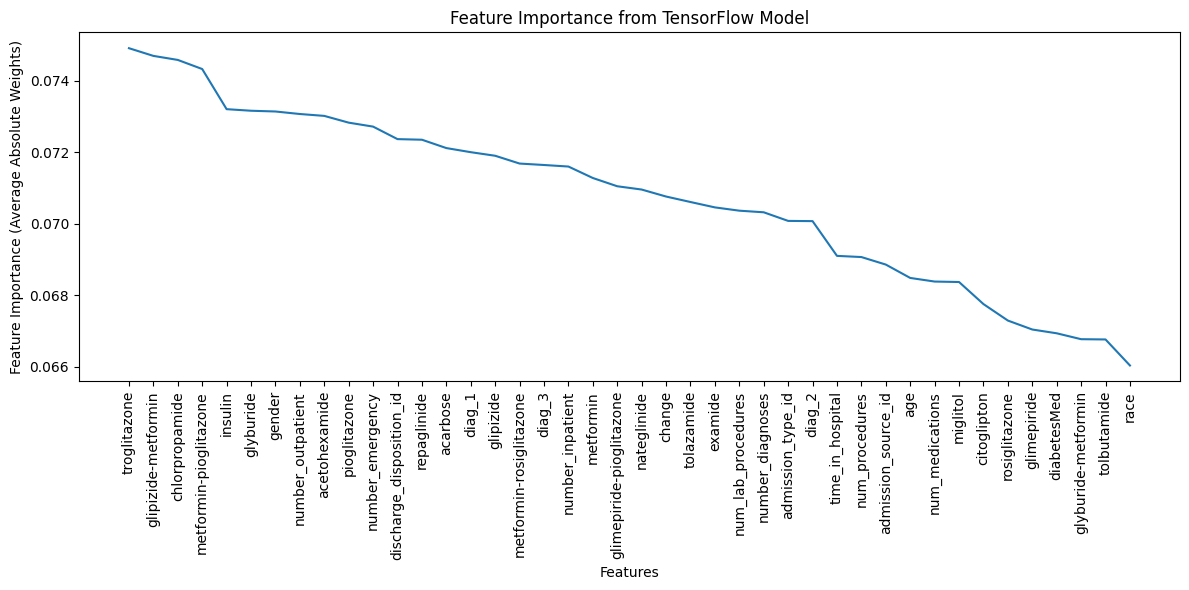

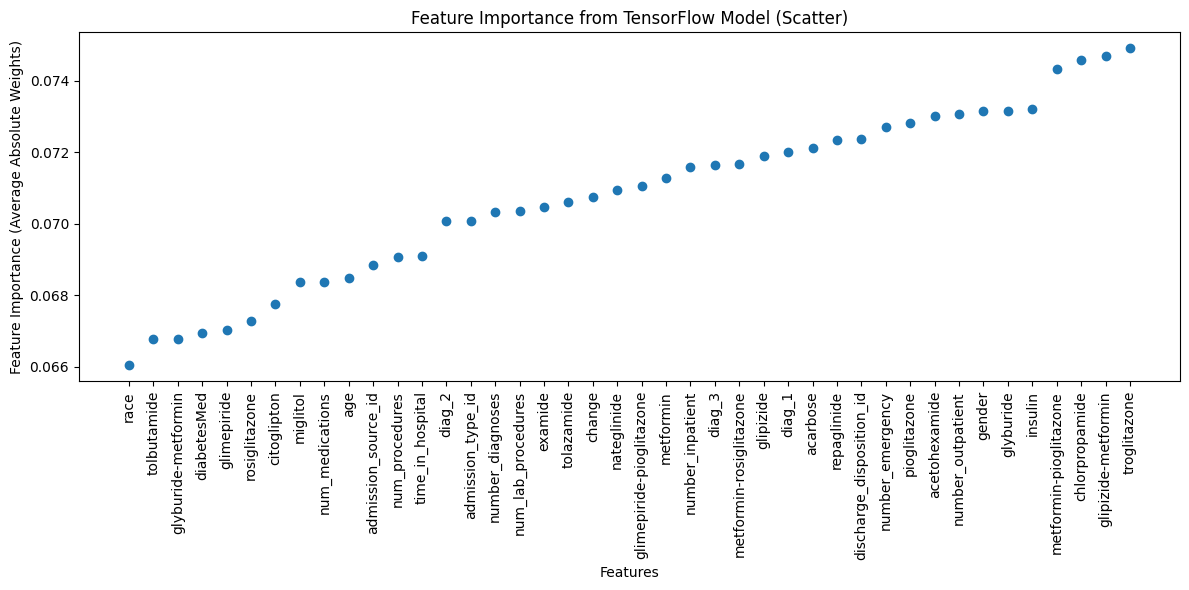

In [ ]:
# prompt: write code to plot feature importance of all features for tf model, instead of bar graph make line or some other graphs

import matplotlib.pyplot as plt

# Assuming 'model' is your trained TensorFlow model
# and X_train is your training data

# Get feature importances (example using weights from the first layer)
weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(weights), axis=1)  # Average absolute weights

# Sort features by importance
sorted_idx = np.argsort(feature_importances)
sorted_features = X_train.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(sorted_features[::-1], sorted_importances[::-1])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance (Average Absolute Weights)")
plt.title("Feature Importance from TensorFlow Model")
plt.tight_layout()
plt.show()


#Alternative plot types:
# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance (Average Absolute Weights)")
plt.title("Feature Importance from TensorFlow Model (Scatter)")
plt.tight_layout()
plt.show()

#Other plot types:
# You can explore other plot types like area plots, or combine line plots with bar graphs
#  for a more detailed visual representation. Just replace the above plotting code
#  with the code for your preferred plot type.  Refer to the Matplotlib documentation for
#  available plot types and customization options.

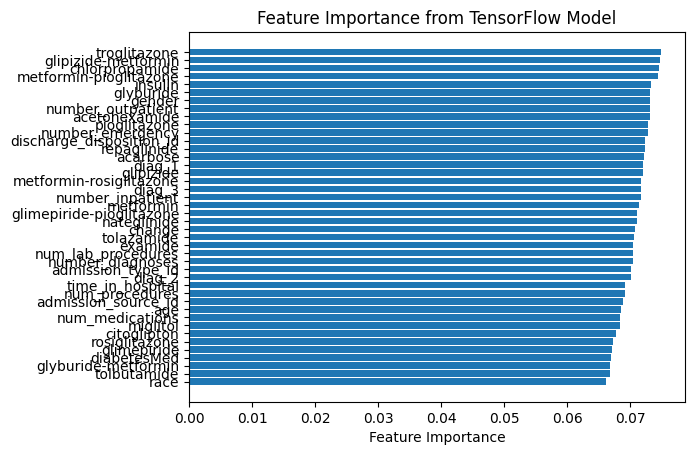

In [ ]:
# prompt: write code to plot feature importance of all features for tf model

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your trained TensorFlow model and 'X_train' are your training features
# Get feature importance from the model (method depends on your model architecture)

# Method 1: For models with accessible weights (e.g., simple Dense networks)
try:
    feature_importances = np.abs(model.layers[0].get_weights()[0]).mean(axis=1) # Average absolute weights of the first layer
    feature_names = X_train.columns

    # Sort features by importance
    sorted_indices = np.argsort(feature_importances)[::-1]
    feature_names = [feature_names[i] for i in sorted_indices]
    feature_importances = feature_importances[sorted_indices]


    #plt.figure(figsize=(10, 6))
    plt.barh(feature_names[::], feature_importances[::])
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance from TensorFlow Model")
    plt.gca().invert_yaxis() # Invert y-axis for better readability
    plt.show()
except:
    print("Could not extract feature importance using weights")


##plot 1

In [ ]:
def find_outliers_iqr(data):
    """Finds outliers in a dataset using the IQR method."""
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

for column in X_integer.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(X_integer[column])
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)

    outliers = find_outliers_iqr(X_integer[column])
    print(f"Number of outliers in {column}: {len(outliers)}")
    plt.show()

# Additional Exploratory Analysis

# Printing the length of integer and categorical columns
print("Length of integer columns:", len(integer_columns))
print("Length of categorical columns:", len(categorical_columns))
print("Sum of integer and categorical columns:", len(integer_columns) + len(categorical_columns))

##Plots 2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics (replace with actual values from your evaluation)
model_names = ['Neural Network', 'EBM']
accuracy = [0.632, 0.645]
precision = [0.61, 0.63]
recall = [0.62, 0.65]
f1_score = [0.615, 0.64]

# Create bar chart
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1-Score')

ax.set_xlabel('Model')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()


In [ ]:
import shap

# Assuming 'shap_values' have been calculated using shap.DeepExplainer or KernelExplainer
shap.summary_plot(shap_values[0], X_test)
# Display SHAP force plot for the first instance in the test set
single_instance = X_test.iloc[0:1]  # Selecting the first instance

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], single_instance)


In [ ]:
import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.to_numpy(),
    feature_names=X_train.columns,
    class_names=['No Readmission', 'Readmission'],
    mode='classification'
)

# Explain a single prediction
exp = explainer.explain_instance(
    X_test.iloc[0].to_numpy(),
    model.predict,
    num_features=10
)

# Display the explanation
exp.show_in_notebook()


##shap lime

In [ ]:
# Make predictions and generate a classification report
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))

In [ ]:

# Method 2: Using SHAP (SHapley Additive exPlanations) values
# This method is more general and can be used with different model types, but requires installing shap.
# Install SHAP first if not already installed:
# !pip install shap
try:
    import shap

    # Explain the model's predictions using SHAP
    explainer = shap.KernelExplainer(model.predict, X_train.sample(100)) # Sample for speed
    shap_values = explainer.shap_values(X_train.sample(100))

    # Plot the summary plot
    shap.summary_plot(shap_values[1], X_train.sample(100), plot_type="bar")
except ImportError:
    print("SHAP is not installed. Skipping SHAP-based feature importance.")
except Exception as e:
    print(f"An error occurred while calculating SHAP values: {e}")

In [ ]:
import shap

# Initialize the explainer with the model
explainer = shap.DeepExplainer(model, X_train[:100].values)  # Limit to a sample for memory efficiency

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test[:10].values)  # Limit to a subset for demonstration

# Visualize SHAP values for a single prediction
shap.initjs()
# shap_values now contains SHAP values for each sample in X_test[:10]
# Each element in shap_values is a 2D array (or 1D for binary classification)

# Visualize SHAP values for a single prediction (e.g., the first prediction)
# Reshape shap_values to be 2-dimensional if necessary
# Assuming you have a binary classification task
shap_values_single = shap_values[0].reshape(-1) # Reshape to 1D for binary classification

shap.force_plot(explainer.expected_value[0], shap_values_single, X_test.iloc[0])

# Summarize feature importance
shap.summary_plot(shap_values, X_test[:10]) # Use the subset of X_test used for SHAP calculation

In [ ]:
# Ensure that X_test is converted to a NumPy array or keep it as a DataFrame with consistent indexing
single_instance = X_test.iloc[0:1]  # Select the first instance correctly as a 2D DataFrame

# Visualize SHAP values for the first instance
shap.initjs()
try:
    shap.force_plot(explainer.expected_value[0], shap_values[0][0], single_instance)
except KeyError:
    # If using a DataFrame causes issues, convert to a NumPy array
    single_instance_np = single_instance.to_numpy()
    shap.force_plot(explainer.expected_value[0], shap_values[0][0], single_instance_np)


In [ ]:
import shap

# ... (rest of the code)

# Visualize SHAP values for a single prediction
shap.initjs()
# Pass the entire SHAP values for the first instance, not just the first feature's value
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])

# ... (rest of the code)

In [ ]:
!pip install lime


In [ ]:
import lime
import lime.lime_tabular
X_train = X_train[:1000]
y_train = y_train[:1000]
X_test = X_test[:100]
y_test = y_test[:100]
# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.to_numpy(),
    feature_names=X_train.columns,
    class_names=['No Readmission', 'Readmission'],
    mode='classification'
)

# Explain a single prediction
exp = explainer.explain_instance(
    X_test.iloc[0].to_numpy(),
    model.predict,
    num_features=10
)

# Display the explanation
exp.show_in_notebook()


In [ ]:
# prompt: write code to plot feature importance of all features

import matplotlib.pyplot as plt

# Assuming 'ebm' is your trained ExplainableBoostingClassifier model
feature_importances = ebm.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

NameError: name 'ebm' is not defined

##model results

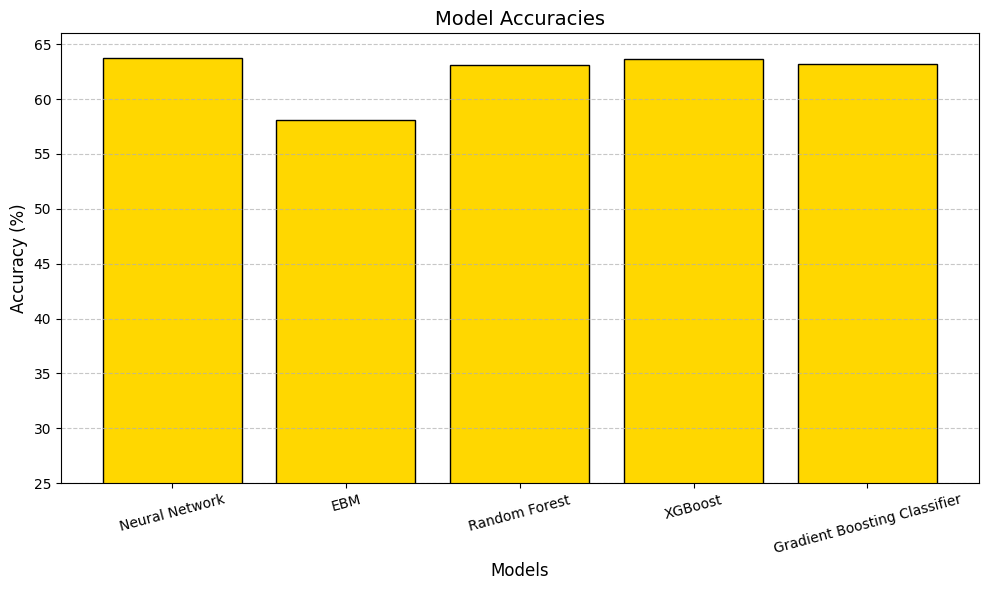

In [ ]:
import matplotlib.pyplot as plt

# Data for the graph
models = [
    "Neural Network",
    "EBM",
    "Random Forest",
    "XGBoost",
    "Gradient Boosting Classifier"
]
accuracies = [63.79, 58.07, 63.12, 63.69, 63.17]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, edgecolor='black', color='gold')
plt.title('Model Accuracies', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(25, 66)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()
